# 検証ログとテストログを読み込む

In [4]:
import json
import numpy as np

model_name = "RFEN_28_23_21_baseline_A"############ logに保存されたフォルダ名を入力 ###############

eval_data = open("./log/{}/valid_log/json_log/json_log.json".format(model_name), 'r',encoding="utf-8_sig")
valid_eval_json_load = json.load(eval_data)
print(valid_eval_json_load.keys())

import json
import numpy as np
eval_data = open("./log/{}/test_log/json_log/json_log.json".format(model_name), 'r',encoding="utf-8_sig")
test_eval_json_load = json.load(eval_data)
print(test_eval_json_load.keys())

log_data = open("./log/{}/log.json".format(model_name), 'r',encoding="utf-8_sig")
log_data = json.load(log_data)

def evaluation(cm):
    recall = []
    precision = []
    f1 = []
    accuracy = []
    
    for i in range(len(cm)):
        one_recall = cm[i][1][1] / (cm[i][1][1] + cm[i][1][0])
        one_precision = cm[i][1][1] / (cm[i][1][1] + cm[i][0][1])
        one_f1 = 2 * cm[i][1][1] / (2 * cm[i][1][1] + cm[i][0][1] + cm[i][1][0])
        one_accuracy = (cm[i][1][1] + cm[i][0][0]) /(cm[i][1][1] + cm[i][0][0] + cm[i][0][1] + cm[i][1][0])
        
        recall.append(one_recall)
        precision.append(one_precision)
        f1.append(one_f1)
        accuracy.append(one_accuracy)
    return recall, precision, f1, accuracy

dict_keys(['valid_loss', 'micro_valid_recall', 'micro_valid_precision', 'micro_valid_f1', 'micro_valid_accuracy', 'macro_valid_recall', 'macro_valid_precision', 'macro_valid_f1', 'macro_valid_accuracy', 'cm'])
dict_keys(['micro_test_recall', 'micro_test_precision', 'micro_test_f1', 'micro_test_accuracy', 'macro_test_recall', 'macro_test_precision', 'macro_test_f1', 'macro_test_accuracy', 'test_each_f1_list', 'cm'])


# 検証データに対する評価値(f1,recall,precision)の推移, 検証におけるf1値が最大となったepochの回数を取得

80
検証データのmacroF1の最高値のepochは 49
評価値は 0.5356975101446625


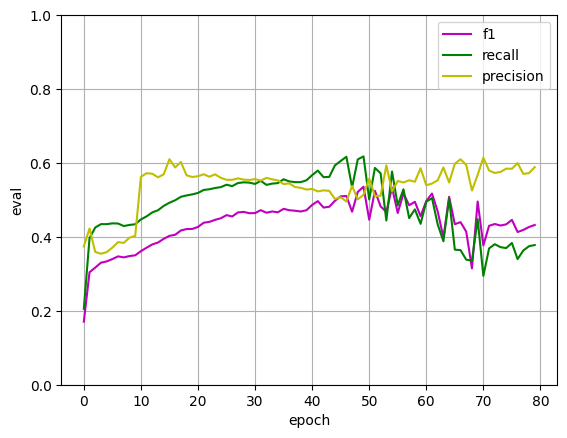

In [5]:
#学習曲線の描画

import matplotlib.pyplot as plt
import numpy as np

fig=plt.figure()#グラフの描画領域を作成

plt.plot(range(len(valid_eval_json_load["macro_valid_f1"])), valid_eval_json_load["macro_valid_f1"], 'm-', label='f1')
plt.plot(range(len(valid_eval_json_load["macro_valid_recall"])), valid_eval_json_load["macro_valid_recall"], 'g-', label='recall')
plt.plot(range(len(valid_eval_json_load["macro_valid_precision"])), valid_eval_json_load["macro_valid_precision"], 'y-', label='precision')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('eval')
plt.ylim(0, 1)
plt.grid()
print(len(valid_eval_json_load["macro_valid_f1"]))
valid_f1_max_epoch = np.argmax(valid_eval_json_load["macro_valid_f1"])

print("検証データのmacroF1の最高値のepochは", valid_f1_max_epoch)
print("評価値は",max(valid_eval_json_load["macro_valid_f1"]))

# 検証でのf1が最大となったepochのテストデータの評価値(f1,recall,precision)を出力

In [6]:
test_valid_max_epoch_cm = test_eval_json_load["cm"][valid_f1_max_epoch]

recall, precision, f1, accuracy = evaluation(test_valid_max_epoch_cm)

print("macro_f1:{}".format(np.mean(f1)))
f1 = [round(x, 3) for x in f1]
print(f1)

print("macro_recall:{}".format(np.mean(recall)))
recall = [round(x, 3) for x in recall]
print(recall)

print("macro_precision:{}".format(np.mean(precision)))
precision = [round(x, 3) for x in precision]
print(precision)

macro_f1:0.5067823447951467
[0.498, 0.574, 0.583, 0.581, 0.298]
macro_recall:0.5932301817152457
[0.416, 0.811, 0.879, 0.586, 0.274]
macro_precision:0.4806439148612077
[0.62, 0.444, 0.436, 0.577, 0.327]


# テストデータに対する評価値(f1,recall,precision)の推移

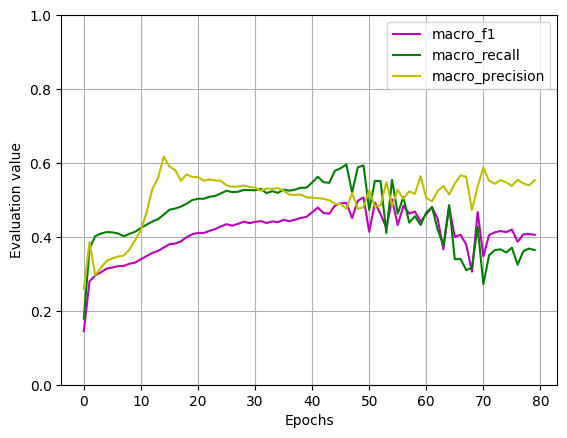

In [7]:
fig=plt.figure()#グラフの描画領域を作成

plt.plot(range(len(test_eval_json_load["macro_test_f1"])), test_eval_json_load["macro_test_f1"], 'm-', label='macro_f1')
plt.plot(range(len(test_eval_json_load["macro_test_recall"])), test_eval_json_load["macro_test_recall"], 'g-', label='macro_recall')
plt.plot(range(len(test_eval_json_load["macro_test_precision"])), test_eval_json_load["macro_test_precision"], 'y-', label='macro_precision')

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Evaluation value')
plt.ylim(0, 1)
plt.grid()
